In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import json
import os


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d gauravduttakiit/indian-liver-patient

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/indian-liver-patient
License(s): CC0-1.0
  0% 0.00/8.12k [00:00<?, ?B/s]
100% 8.12k/8.12k [00:00<00:00, 19.5MB/s]


In [6]:
from zipfile import ZipFile
with ZipFile("/content/indian-liver-patient.zip",'r') as zip_ref:
  zip_ref.extractall()

In [7]:
df=pd.read_csv("/content/indian_liver_patient_dataset.csv")

In [8]:
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [9]:
df.dtypes

,0
Age,int64
Gender,object
Total_Bilirubin,float64
Direct_Bilirubin,float64
Alkaline_Phosphotase,int64
Alamine_Aminotransferase,int64
Aspartate_Aminotransferase,int64
Total_Protiens,float64
Albumin,float64
Albumin_and_Globulin_Ratio,float64


In [10]:
df.shape

(500, 11)

In [11]:
df.isnull().values.any()


np.True_

In [12]:
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


In [13]:
df["Albumin_and_Globulin_Ratio"].fillna(df["Albumin_and_Globulin_Ratio"].mean(),inplace=True)

/tmp/ipython-input-13-2391940236.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Albumin_and_Globulin_Ratio"].fillna(df["Albumin_and_Globulin_Ratio"].mean(),inplace=True)


In [14]:
df.isnull().values.any()


np.False_

In [15]:
df.isnull().sum()


,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


In [16]:
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


<Axes: xlabel='Total_Bilirubin', ylabel='Liver_Problem'>

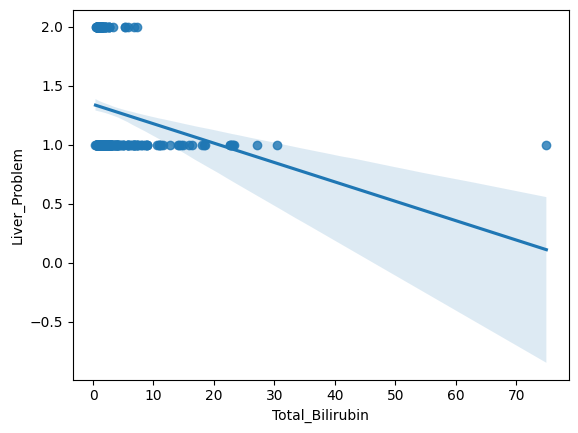

In [17]:
import seaborn as sns
sns.regplot(x='Total_Bilirubin',y='Liver_Problem', data=df)

<Axes: xlabel='Direct_Bilirubin', ylabel='Liver_Problem'>

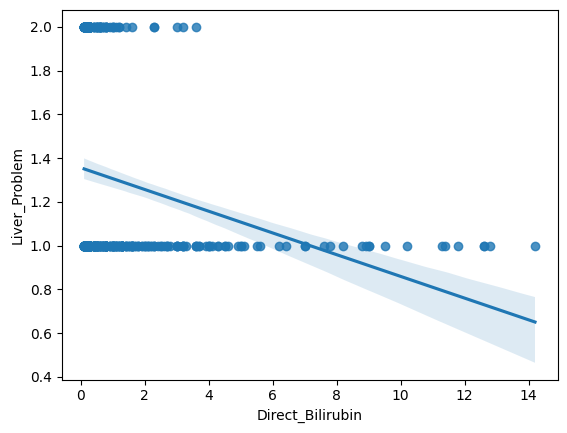

In [18]:
sns.regplot(x='Direct_Bilirubin',y='Liver_Problem', data=df)

<Axes: xlabel='Alkaline_Phosphotase', ylabel='Liver_Problem'>

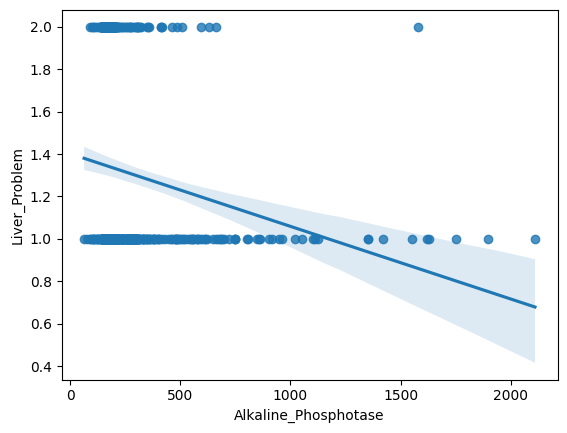

In [19]:
sns.regplot(x='Alkaline_Phosphotase', y='Liver_Problem', data=df)

In [20]:
df["Liver_Problem"].value_counts()

,count
Liver_Problem,
1,350
2,150


In [21]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1}).astype(int)
df['Liver_Problem']=df['Liver_Problem'].map({2:0,1:1}).astype(int)
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,0,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,1,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,0,0.9,0.3,202,22,19,7.4,4.1,1.20,0
9,55,0,0.7,0.2,290,53,58,6.8,3.4,1.00,1


1->Liver patient
2->Non Liver patient

In [28]:
# Separating data and label
x=df.drop(columns='Liver_Problem',axis=1)
y=df['Liver_Problem']
print(x)
print(y)

     Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       1              0.7               0.1                   187   
1     62       0             10.9               5.5                   699   
2     62       0              7.3               4.1                   490   
3     58       0              1.0               0.4                   182   
4     72       0              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
495   32       0              0.7               0.2                   165   
496   24       0              1.0               0.2                   189   
497   67       0              2.2               1.1                   198   
498   68       0              1.8               0.5                   151   
499   55       0              3.6               1.6                   349   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  

In [29]:
import joblib
scaler=StandardScaler()
scaler.fit(x)
sdata=scaler.transform(x)
print(sdata)
joblib.dump(scaler, 'liver_scaler.pkl')

[[ 1.23594934  1.70477271 -0.37219102 ...  0.32649142  0.1642174
  -0.20800696]
 [ 1.05431674 -0.58658846  1.62189889 ...  0.96991482  0.0390517
  -0.75442973]
 [ 1.05431674 -0.58658846  0.91810245 ...  0.51032668  0.1642174
  -0.24215838]
 ...
 [ 1.35703775 -0.58658846 -0.0789425  ...  0.69416193 -0.21127971
  -0.89103542]
 [ 1.41758195 -0.58658846 -0.1571421  ...  0.05073853  1.04037733
   2.18259268]
 [ 0.63050732 -0.58658846  0.19475611 ...  0.69416193 -0.33644541
  -1.23254966]]


['liver_scaler.pkl']

In [33]:
x=sdata
y=df['Liver_Problem']
print(x)
print(y)

[[ 1.23594934  1.70477271 -0.37219102 ...  0.32649142  0.1642174
  -0.20800696]
 [ 1.05431674 -0.58658846  1.62189889 ...  0.96991482  0.0390517
  -0.75442973]
 [ 1.05431674 -0.58658846  0.91810245 ...  0.51032668  0.1642174
  -0.24215838]
 ...
 [ 1.35703775 -0.58658846 -0.0789425  ...  0.69416193 -0.21127971
  -0.89103542]
 [ 1.41758195 -0.58658846 -0.1571421  ...  0.05073853  1.04037733
   2.18259268]
 [ 0.63050732 -0.58658846  0.19475611 ...  0.69416193 -0.33644541
  -1.23254966]]
0      1
1      1
2      1
3      1
4      1
      ..
495    0
496    1
497    1
498    1
499    1
Name: Liver_Problem, Length: 500, dtype: int64


In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)
print(x.shape,xtrain.shape,xtest.shape)#25% test 80% train

(500, 10) (375, 10) (125, 10)


In [60]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
model = SVC(kernel='linear', C=1.0, class_weight='balanced',gamma=0.1)
model.fit(xtrain,ytrain)

xtrain_acc_prediction=model.predict(xtrain)
training_data_acc=accuracy_score(xtrain_acc_prediction,ytrain)
print('Accuracy Score of training data:',training_data_acc)

xtest_acc_prediction=model.predict(xtest)
testing_data_acc=accuracy_score(xtest_acc_prediction,ytest)
print('Accuracy Score of testing data:',testing_data_acc)

print(classification_report(ytest,xtest_acc_prediction))

Accuracy Score of training data: 0.6293333333333333
Accuracy Score of testing data: 0.6
              precision    recall  f1-score   support

           0       0.42      0.87      0.57        38
           1       0.89      0.48      0.63        87

    accuracy                           0.60       125
   macro avg       0.66      0.68      0.60       125
weighted avg       0.75      0.60      0.61       125



In [42]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(class_weight='balanced')
model1.fit(xtrain,ytrain)
xtrain_acc_prediction=model1.predict(xtrain)
training_data_acc=accuracy_score(xtrain_acc_prediction,ytrain)
print('Accuracy Score of training data:',training_data_acc)
xtest_acc_prediction=model1.predict(xtest)
testing_data_acc=accuracy_score(xtest_acc_prediction,ytest)
print('Accuracy Score of testing data:',testing_data_acc)

print(classification_report(ytest,xtest_acc_prediction))

Accuracy Score of training data: 0.656
Accuracy Score of testing data: 0.616
              precision    recall  f1-score   support

           0       0.42      0.71      0.53        38
           1       0.82      0.57      0.68        87

    accuracy                           0.62       125
   macro avg       0.62      0.64      0.60       125
weighted avg       0.70      0.62      0.63       125



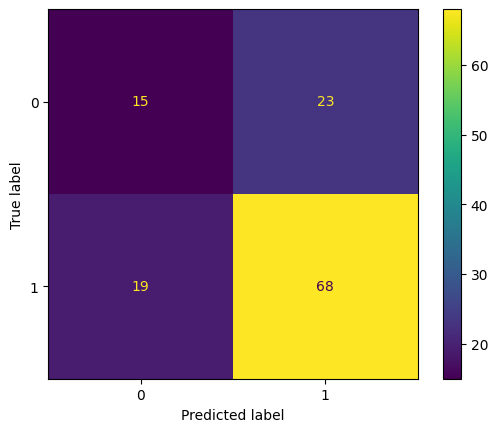

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, xtest_acc_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [44]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=100,class_weight='balanced')
model2.fit(xtrain,ytrain)
xtrain_acc_prediction=model2.predict(xtrain)
training_data_acc=accuracy_score(xtrain_acc_prediction,ytrain)
print('Accuracy Score of training data:',training_data_acc)
xtest_acc_prediction=model2.predict(xtest)
testing_data_acc=accuracy_score(xtest_acc_prediction,ytest)
print('Accuracy Score of testing data:',testing_data_acc)

print(classification_report(ytest,xtest_acc_prediction))

Accuracy Score of training data: 1.0
Accuracy Score of testing data: 0.704
              precision    recall  f1-score   support

           0       0.52      0.32      0.39        38
           1       0.75      0.87      0.80        87

    accuracy                           0.70       125
   macro avg       0.63      0.59      0.60       125
weighted avg       0.68      0.70      0.68       125



In [45]:
from sklearn.linear_model import SGDClassifier
model3=SGDClassifier(class_weight='balanced')
model3.fit(xtrain,ytrain)
xtrain_acc_prediction=model3.predict(xtrain)
training_data_acc=accuracy_score(xtrain_acc_prediction,ytrain)
print('Accuracy Score of training data:',training_data_acc)
xtest_acc_prediction=model3.predict(xtest)
testing_data_acc=accuracy_score(xtest_acc_prediction,ytest)
print('Accuracy Score of testing data:',testing_data_acc)

print(classification_report(ytest,xtest_acc_prediction))

Accuracy Score of training data: 0.6773333333333333
Accuracy Score of testing data: 0.664
              precision    recall  f1-score   support

           0       0.44      0.39      0.42        38
           1       0.75      0.78      0.76        87

    accuracy                           0.66       125
   macro avg       0.59      0.59      0.59       125
weighted avg       0.65      0.66      0.66       125

